In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/SMART_I_H_DATA.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
pip install split-folders

In [ ]:
import os
import random
import shutil
import numpy as np
from shutil import copyfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet,DenseNet169
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import splitfolders
splitfolders.ratio(r'/content/SMART_I_H_DATA', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 27826 files [00:25, 1087.54 files/s]


In [ ]:
train_dir = r'/content/output/train'
Val_dir = r'/content/output/val'
test_dir=r'/content/output/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,#gap
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(224,224),
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(Val_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(224,224),
                                                         class_mode='categorical')

Found 22251 images belonging to 22 classes.
Found 2772 images belonging to 22 classes.


In [ ]:
# Load MobileNet pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224, 3))


# Freeze layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224,224, 3))
for layer in base_model.layers:
    layer.trainable = False
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(22, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
model.compile(optimizer=Adam(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


# model.compile(optimizer=Adam(),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])
model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 13,506,646 (51.52 MB)

 Trainable params: 863,766 (3.30 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
history = model.fit(
    train_generator,
        epochs=10,
    verbose=1,
        validation_data=validation_generator,
)

Epoch 1/10
696/696 [==============================] - 564s 798ms/step - loss: 0.6339 - accuracy: 0.7930 - val_loss: 0.4324 - val_accuracy: 0.8571
Epoch 2/10
696/696 [==============================] - 512s 735ms/step - loss: 0.3733 - accuracy: 0.8716 - val_loss: 0.3291 - val_accuracy: 0.8853
Epoch 3/10
696/696 [==============================] - 516s 741ms/step - loss: 0.3352 - accuracy: 0.8865 - val_loss: 0.3176 - val_accuracy: 0.8914
Epoch 4/10
696/696 [==============================] - 523s 751ms/step - loss: 0.3007 - accuracy: 0.8963 - val_loss: 0.3321 - val_accuracy: 0.8824
Epoch 5/10
696/696 [==============================] - 525s 754ms/step - loss: 0.2777 - accuracy: 0.9041 - val_loss: 0.2713 - val_accuracy: 0.9069
Epoch 6/10
696/696 [==============================] - 525s 754ms/step - loss: 0.2598 - accuracy: 0.9099 - val_loss: 0.2757 - val_accuracy: 0.9058
Epoch 7/10
696/696 [==============================] - 536s 770ms/step - loss: 0.2453 - accuracy: 0.9144 - val_loss: 0.2716 -

<Figure size 640x480 with 0 Axes>

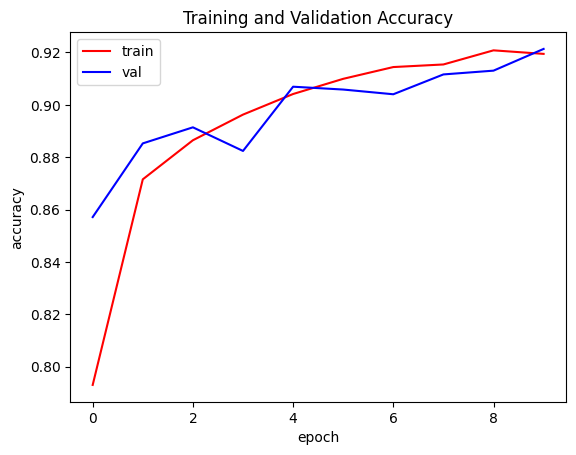

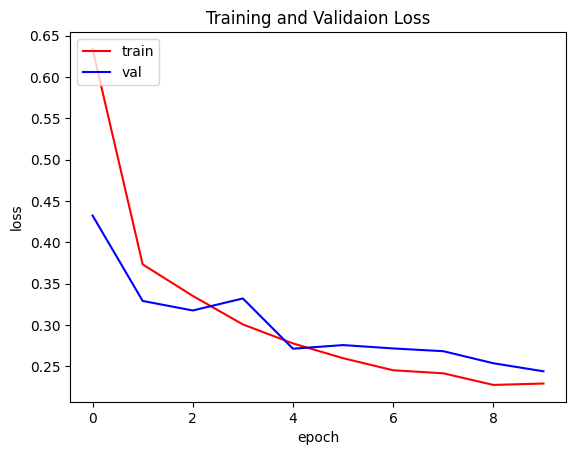

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
test_dir='output/test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(224,224),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2802 images belonging to 22 classes.
2802/2802 [==============================] - 248s 88ms/step - loss: 0.2632 - accuracy: 0.9143
accuracy test:  0.9143468737602234
loss test:  0.26317837834358215


2802/2802 [==============================] - 253s 89ms/step


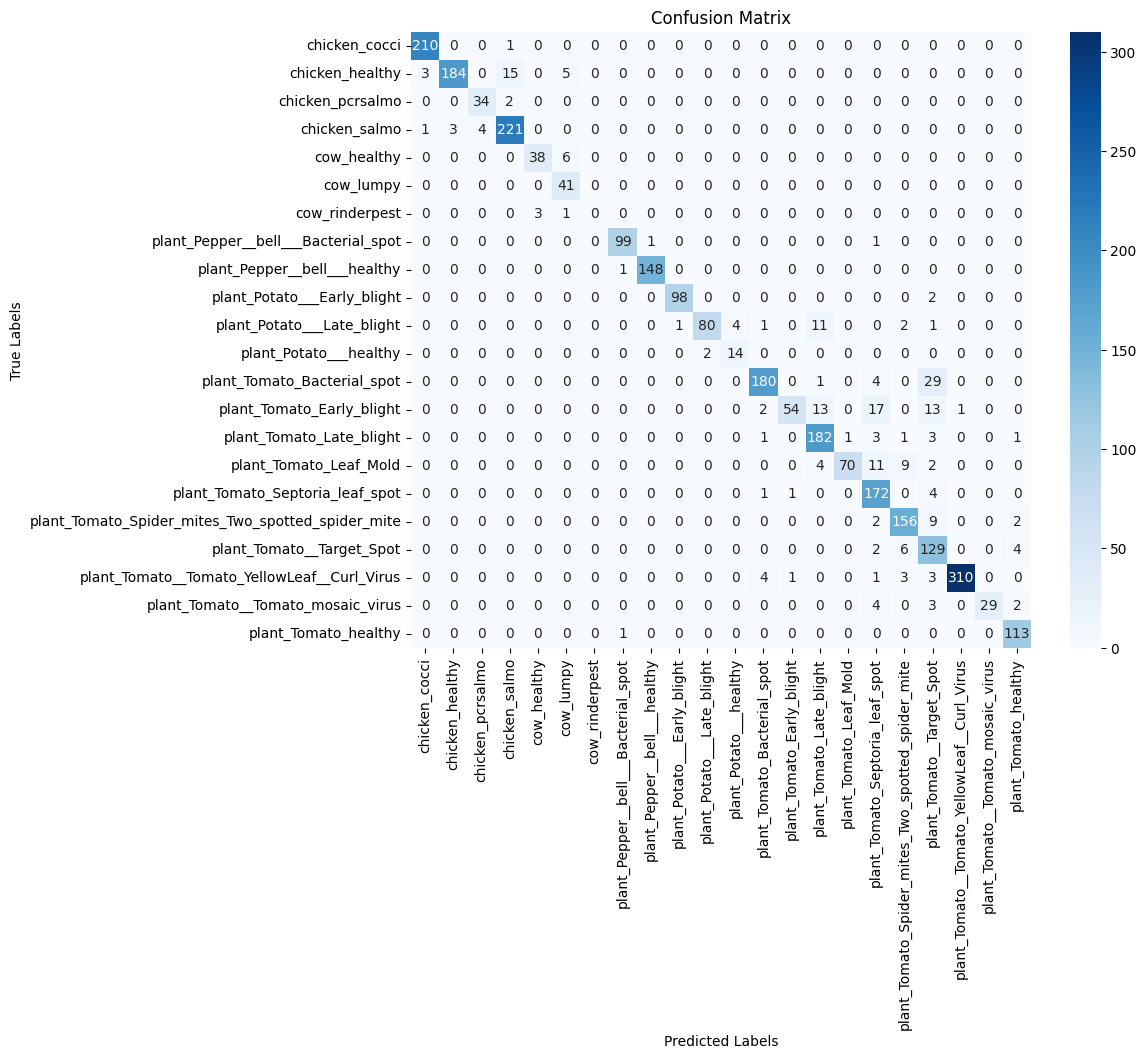

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on test data and create confusion matrix and classification report
# Get the ground truth labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Predict the labels on the test dataset
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Create the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print('Classification Report')
print(class_report)

Classification Report
                                                   precision    recall  f1-score   support

                                    chicken_cocci       0.98      1.00      0.99       211
                                  chicken_healthy       0.98      0.89      0.93       207
                                 chicken_pcrsalmo       0.89      0.94      0.92        36
                                    chicken_salmo       0.92      0.97      0.94       229
                                      cow_healthy       0.93      0.86      0.89        44
                                        cow_lumpy       0.77      1.00      0.87        41
                                   cow_rinderpest       0.00      0.00      0.00         4
              plant_Pepper__bell___Bacterial_spot       0.98      0.98      0.98       101
                     plant_Pepper__bell___healthy       0.99      0.99      0.99       149
                      plant_Potato___Early_blight       0.99      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save(r"sih.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# # Load the pre-trained model (replace with the actual path to your saved model)
# model_path = 'path_to_your_model.h5'
# model = load_model(model_path)

# Load and preprocess the image
image_path = '/content/SMART_I_H_DATA/cow_lumpy/100_jpg.rf.fe03c23fdd88ebc8439e1a8062e2d034.jpg'
img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of the model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
img_array /= 255.0  # Normalize the image data

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability class

# Assuming you have a list of class names
class_labels = sorted([
    "chicken_cocci", "chicken_healthy", "chicken_pcrsalmo", "chicken_salmo",
    "cow_healthy", "cow_lumpy", "cow_rinderpest",
    "plant_Pepper_bell__Bacterial_spot", "plant_Pepper_bell__healthy",
    "plant_Potato__Early_blight", "plant_Potato__healthy", "plant_Potato__Late_blight",
    "plant_Tomato__Target_Spot", "plant_Tomato__Tomato_mosaic_virus",
    "plant_Tomato__Tomato_YellowLeaf_Curl_Virus", "plant_Tomato_Bacterial_spot",
    "plant_Tomato_Early_blight", "plant_Tomato_healthy", "plant_Tomato_Late_blight",
    "plant_Tomato_Leaf_Mold", "plant_Tomato_Septoria_leaf_spot",
    "plant_Tomato_Spider_mites_Two_spotted_spider_mite"
])

# Get the predicted class
predicted_class = class_labels[predicted_class_index]

# Split the class label at the first underscore '_'
parts = predicted_class.split('_', 2)
if len(parts) == 3:
    animal_plant = parts[1]  # Get the second part after 'plant_' or 'animal_'
    disease = parts[2]
else:
    animal_plant = parts[0]
    disease = parts[1]

# Construct the output sentence
output_sentence = f"{animal_plant} has {disease}"

print(output_sentence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Tomato has _Target_Spot


In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# # Load the pre-trained model (replace with the actual path to your saved model)
# model_path = '/content/sih.h5'
# model = load_model(model_path)

# List of class names
class_labels = sorted([
    "chicken_cocci", "chicken_healthy", "chicken_pcrsalmo", "chicken_salmo",
    "cow_healthy", "cow_lumpy", "cow_rinderpest",
    "plant_Pepper_bell__Bacterial_spot", "plant_Pepper_bell__healthy",
    "plant_Potato__Early_blight", "plant_Potato__healthy", "plant_Potato__Late_blight",
    "plant_Tomato__Target_Spot", "plant_Tomato__Tomato_mosaic_virus",
    "plant_Tomato__Tomato_YellowLeaf_Curl_Virus", "plant_Tomato_Bacterial_spot",
    "plant_Tomato_Early_blight", "plant_Tomato_healthy", "plant_Tomato_Late_blight",
    "plant_Tomato_Leaf_Mold", "plant_Tomato_Septoria_leaf_spot",
    "plant_Tomato_Spider_mites_Two_spotted_spider_mite"
])

def predict(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class
    predicted_class = class_labels[predicted_class_index]

    # Split the class label at the first underscore '_'
    parts = predicted_class.split('_', 2)
    if len(parts) == 3:
        animal_plant = parts[1]
        disease = parts[2]
    else:
        animal_plant = parts[0]
        disease = parts[1]

    # Construct the output sentence
    output_sentence = f"{animal_plant} has {disease}"
    return output_sentence

# Streamlit application
st.title("Disease Prediction from Image")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)

    # Save the uploaded file to a temporary location
    with open("temp.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())

    # Run prediction
    result = predict("temp.jpg")

    # Display the result
    st.write(result)


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.216.8:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C
